# Análise de Dados Públicos de Usuários e Repositórios Moçambicanos no GitHub  

1. **Usuários e Repositórios Mais Curtidos:**  
   Identificação dos perfis e projectos que recebem maior reconhecimento e engajamento da comunidade.  

2. **Adesão Anual de Usuários Moçambicanos no GitHub:**  
   Análise do crescimento do número de desenvolvedores moçambicanos que se juntam à plataforma ao longo dos anos.  

3. **Variação Anual de Criação de Repositórios Públicos:**  
   Avaliação de como a criação de novos repositórios evolui anualmente, reflectindo a inovação da comunidade.  

4. **Linguagens Mais Usadas em Repositórios Públicos:**  
   Mapeamento das linguagens de programação predominantes nos repositórios moçambicanos.  

5. **Distribuição de Repositórios Curtidos (Nacionais vs. Internacionais):**  
   Comparação entre os repositórios que recebem mais curtidas, distinguindo os projectos nacionais dos internacionais.  

6. **Linguagens Mais Curtidas:**  
   Análise das linguagens de programação que mais recebem reconhecimento e curtidas em repositórios.

# Main

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
dir_name = os.getenv('DIR_NAME')
base_path = f'../data/{dir_name}'
os.makedirs(base_path, exist_ok=True)

users_data = pd.read_csv(f'{base_path}/users_data.csv')
repos_data = pd.read_csv(f'{base_path}/repos_data.csv')
starred_data = pd.read_csv(f'{base_path}/starred_repos_data.csv')
starred_repos_users_ids = pd.read_csv(f'{base_path}/starred_repos_users_ids.csv')
issues_data = pd.read_csv(f'{base_path}/issues_data.csv')

In [3]:
print(users_data.columns)
print(repos_data.columns)
print(starred_data.columns)
print(starred_repos_users_ids.columns)
print(issues_data.columns)

Index(['login', 'id', 'name', 'company', 'blog', 'location', 'email', 'bio',
       'twitter_username', 'public_repos', 'public_gists', 'followers',
       'following', 'created_at', 'updated_at'],
      dtype='object')
Index(['id', 'name', 'full_name', 'owner_id', 'html_url', 'description',
       'fork', 'created_at', 'updated_at', 'pushed_at', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'forks_count',
       'open_issues_count', 'topics', 'default_branch', 'license_key',
       'license_name'],
      dtype='object')
Index(['id', 'name', 'full_name', 'owner_id', 'html_url', 'description',
       'fork', 'created_at', 'updated_at', 'pushed_at', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'forks_count',
       'open_issues_count', 'license_key', 'license_name', 'topics',
       'default_branch'],
      dtype='object')
Index(['user_id', 'repo_id', 'owner_id'], dtype='object')
Index(['id', 'number', 'title', 'user_id', 'st

## Cabeçalhos das Tabelas

In [16]:
users_data.head() # Dados de Usuários

,login,id,name,company,blog,location,email,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,CristimiroRoberto,105211388,Cristimiro Robert,NaN,NaN,"Maputo,Moçambique",NaN,NaN,NaN,1,0,0,1,2022-05-09T11:05:51Z,2023-08-01T07:47:18Z
1,LeonelCaetanoSaguar2,7591781,Leonel,NaN,NaN,Mozambique,leonel_saguar@nokiamail.com,NaN,NaN,1,0,0,0,2014-05-15T11:54:04Z,2016-02-27T16:18:08Z
2,coalo,7589719,郭振江,Cassin-Gottlieb,NaN,"3742 ,Ronald Camp ,Westonbury ,Minnesota ,Moza...",985176177@qq.com,"I am 郭振江 ,from Anhui Medical University (安徽医科大...",NaN,37,0,5,41,2014-05-15T07:41:26Z,2024-08-22T06:38:16Z
3,FranciscoJunior12,105241871,Francisco Manuel Domingos Júnior,Universidade Eduardo Mondlane,NaN,"Maputo, Moçambique",NaN,Web Developer | AI enthusiast.,NaN,24,0,23,22,2022-05-09T19:12:32Z,2024-10-31T08:32:56Z
4,kc08-git,59201678,Kith Cuela,NaN,NaN,Mozambique,NaN,"IT,\r\nTrader,\r\nComputer Engineer.",NaN,3,0,0,0,2019-12-24T12:52:27Z,2023-02-27T09:41:14Z


In [17]:
repos_data.head() # Dados de Repositórios Criados

,id,name,full_name,owner_id,html_url,description,fork,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,forks_count,open_issues_count,topics,default_branch,license_key,license_name
0,34689704,zkbooks,fmfortes/zkbooks,1401510,https://github.com/fmfortes/zkbooks,Source code for all ZK books,True,2015-04-27T20:32:59Z,2015-04-27T20:33:00Z,2014-10-16T08:14:18Z,NaN,84354,0,0,Java,0,0,NaN,master,NaN,NaN
1,611797668,fivestar2023,utter-digital-hub/fivestar2023,90717316,https://github.com/utter-digital-hub/fivestar2023,NaN,False,2023-03-09T15:09:52Z,2023-03-09T15:09:52Z,2023-03-09T15:09:53Z,NaN,0,0,0,NaN,0,0,NaN,main,NaN,NaN
2,465922147,FiveStarGroup,utter-digital-hub/FiveStarGroup,90717316,https://github.com/utter-digital-hub/FiveStarG...,NaN,False,2022-03-03T23:54:21Z,2022-03-03T23:58:54Z,2022-04-06T06:42:49Z,NaN,103190,0,0,HTML,0,0,NaN,main,NaN,NaN
3,823343505,laravel,Stivir/laravel,89839917,https://github.com/Stivir/laravel,Laravel is a web application framework with ex...,True,2024-07-02T21:27:03Z,2024-07-02T21:27:03Z,2024-07-02T18:12:21Z,https://laravel.com,10601,0,0,NaN,0,0,NaN,11.x,NaN,NaN
4,458134557,cebesjunior,cebesjunior/cebesjunior,99476250,https://github.com/cebesjunior/cebesjunior,Config files for my GitHub profile.,False,2022-02-11T10:08:06Z,2023-10-30T20:20:52Z,2022-02-11T10:08:06Z,https://github.com/cebesjunior,0,1,1,NaN,0,0,"config, github-config",main,NaN,NaN


In [18]:
starred_data.head() # Dados de Repositórios Curtidos

,id,name,full_name,owner_id,html_url,description,fork,created_at,updated_at,pushed_at,homepage,size,stargazers_count,watchers_count,language,forks_count,open_issues_count,license_key,license_name,topics,default_branch
0,253561143,cursoemvideo-python,cursoemvideo/cursoemvideo-python,8683385,https://github.com/cursoemvideo/cursoemvideo-p...,Curso de Python do CursoemVideo,False,2020-04-06T16:54:24Z,2025-02-07T14:42:56Z,2023-12-06T00:06:32Z,NaN,6439,1307,1307,Python,88,21,mit,MIT License,NaN,master
1,254156892,cursoemvideo-html5,cursoemvideo/cursoemvideo-html5,8683385,https://github.com/cursoemvideo/cursoemvideo-h...,Material do Curso de HTML5 e CSS3 do Curso em ...,False,2020-04-08T17:33:09Z,2025-02-11T12:33:47Z,2024-05-25T23:36:33Z,NaN,37640,2496,2496,HTML,159,43,mit,MIT License,NaN,master
2,658900483,Tamagochi-RafaBallerine,MadduSilva/Tamagochi-RafaBallerine,115591446,https://github.com/MadduSilva/Tamagochi-RafaBa...,NaN,False,2023-06-26T18:14:48Z,2024-11-17T17:53:59Z,2023-06-26T18:15:03Z,NaN,2,2,2,Python,0,0,NaN,NaN,NaN,main
3,919443098,DeepSeek-R1,deepseek-ai/DeepSeek-R1,148330874,https://github.com/deepseek-ai/DeepSeek-R1,NaN,False,2025-01-20T11:57:28Z,2025-02-11T13:08:18Z,2025-02-08T06:57:18Z,NaN,1544,72054,72054,NaN,9270,241,mit,MIT License,NaN,main
4,428050343,hiina,gdscuem/hiina,56219516,https://github.com/gdscuem/hiina,The Community Alphabet,False,2021-11-14T21:54:59Z,2024-06-21T17:28:11Z,2021-11-17T10:14:53Z,NaN,8496,9,9,NaN,0,0,NaN,NaN,"design-system, gdscuem",main


In [19]:
starred_repos_users_ids.head() # Quem curtiu repo de quem

,user_id,repo_id,owner_id
0,117580376,253561143,8683385
1,117580376,254156892,8683385
2,107070900,658900483,115591446
3,107038187,919443098,148330874
4,107038187,428050343,56219516


In [20]:
issues_data.head() # Dados de Issues

,id,number,title,user_id,state,comments,created_at,updated_at,closed_at,body,reactions_total_count,repo_id
0,720034485,1,O botao alterar ao age como previsto,27965287,open,0,2020-10-13T09:11:28Z,2020-10-13T09:11:28Z,NaN,NaN,0,290494857
1,212314827,7,Throw IllegalOperationException if the IExecut...,7803333,open,0,2017-03-07T02:47:58Z,2017-03-07T02:47:58Z,NaN,NaN,0,83659594
2,212018778,6,Introduce Argument Trasformers,7803333,open,0,2017-03-06T03:59:24Z,2017-03-06T03:59:24Z,NaN,Responsible for altering the arguments (adding...,0,83659594
3,212017394,5,Introduce Value FormatException,7803333,open,0,2017-03-06T03:46:00Z,2017-03-06T03:46:00Z,NaN,Exception to be thrown when something goes wro...,0,83659594
4,212017308,4,Introduce ParseException,7803333,open,0,2017-03-06T03:45:00Z,2017-03-06T03:45:00Z,NaN,Exception to be thrown when something goes wro...,0,83659594


## Usuários e Repositórios Mais Curtidos

In [4]:
# Filtrar repositórios nacionais 
nacional_repos_data = repos_data[repos_data['owner_id'].isin(users_data['id'].unique())]

df_merged = nacional_repos_data.merge(
    users_data[['id', 'login']],  
    left_on='owner_id', 
    right_on='id', 
    how='left'
)

df_user_stars = (
    df_merged
    .groupby('login', as_index=False)
    .agg(total_stars=('stargazers_count', 'sum'))
)

df_top_users = df_user_stars.sort_values(
    'total_stars', ascending=False
).head(10)

df_top_repos = nacional_repos_data.sort_values(
    'stargazers_count', ascending=False
).head(10)

final_table = pd.DataFrame({
    'Usuário': df_top_users['login'].values,
    'Estrelas (user)': df_top_users['total_stars'].values,
    'Repositório': df_top_repos['name'].values,
    'Estrelas (repo)': df_top_repos['stargazers_count'].values
})

# Nota: A disposição das linhas não indica relação entre o repositório e o usuário
final_table


,Usuário,Estrelas (user),Repositório,Estrelas (repo)
0,americo,365,sqlifinder,347
1,arnaldo-tomo,335,rtf-html-php,105
2,henck,225,vue-selectize,77
3,isneezy,224,open-weather-icons,70
4,gmahota,181,dBASE.NET,67
5,paymentsds,171,mpesa-js-sdk,62
6,edilsonmatola,122,habitual-ecommerce-app-getx,49
7,GraHms,117,mpesa-php-api,44
8,JefferMarcelino,116,pdf-generator-service,43
9,enoquetembe,92,cakephp-gentelella-theme,43


## Adesão Anual de Usuários Moçambicanos no GitHub

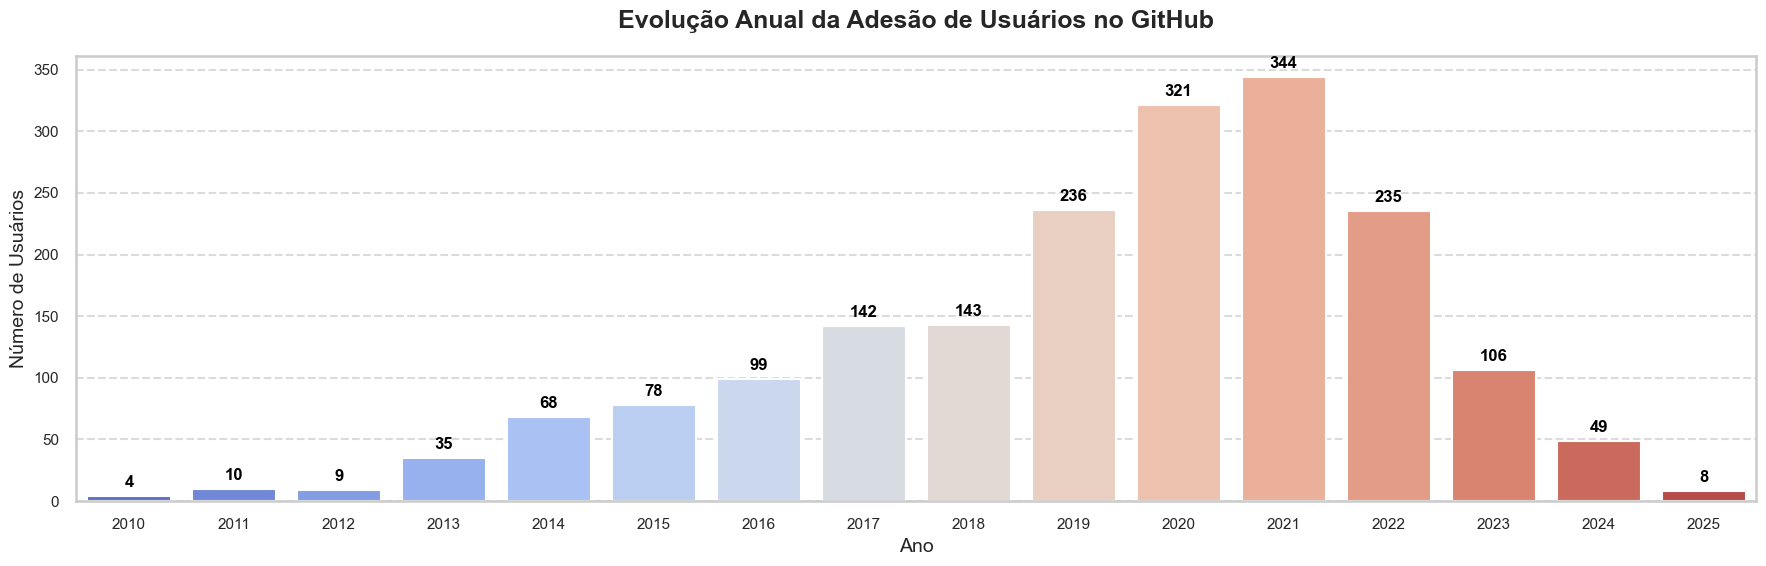

In [5]:
users_data['created_at'] = pd.to_datetime(users_data['created_at'])
users_data['year'] = users_data['created_at'].dt.year

yearly_counts = users_data.groupby('year').size().reset_index(name='user_count')
yearly_counts = yearly_counts.sort_values('year')

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(18, 6))  
ax = sns.barplot(
    x='year', 
    y='user_count', 
    data=yearly_counts, 
    palette='coolwarm'  
)

for i, row in yearly_counts.iterrows():
    ax.text(
        i,                          
        row['user_count'] + 5,      
        str(row['user_count']),     
        ha='center',                
        va='bottom',                
        fontsize=12,
        fontweight='bold',          
        color='black'               
    )

plt.title('Evolução Anual da Adesão de Usuários no GitHub', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Usuários', fontsize=14)

plt.xticks(fontsize=11)  
plt.yticks(fontsize=11)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()


## Variação Anual de Criação de Repositórios Públicos

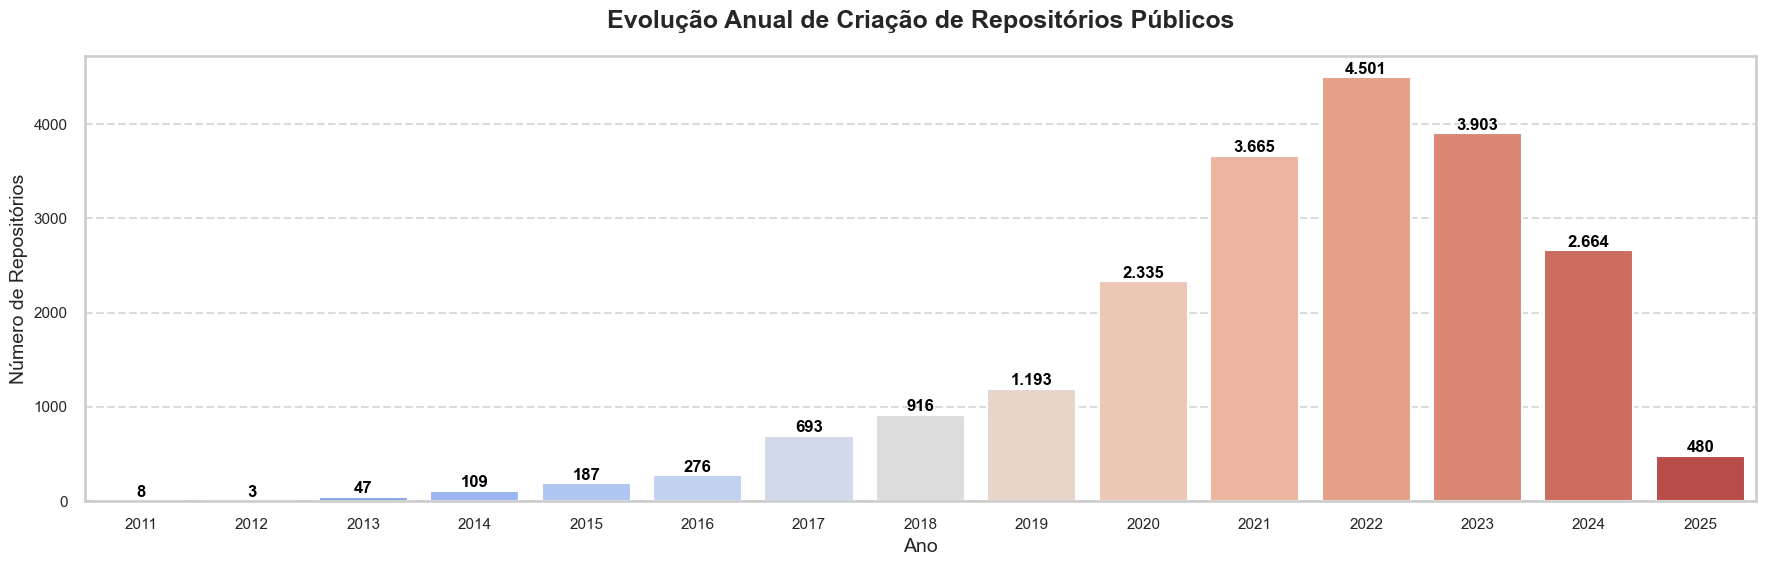

In [6]:
repos_data['created_at'] = pd.to_datetime(repos_data['created_at'])
repos_data['year'] = repos_data['created_at'].dt.year

yearly_counts = repos_data.groupby('year').size().reset_index(name='repo_count')
yearly_counts = yearly_counts.sort_values('year')

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(18, 6))  
ax = sns.barplot(
    x='year', 
    y='repo_count', 
    data=yearly_counts, 
    palette='coolwarm'  
)

for i, row in yearly_counts.iterrows():
    ax.text(
        i,                         
        row['repo_count'] + 5,      
        f"{row['repo_count']:,}".replace(',', '.'),     
        ha='center',                
        va='bottom',                
        fontsize=12,
        fontweight='bold',          
        color='black'               
    )

plt.title('Evolução Anual de Criação de Repositórios Públicos', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Repositórios', fontsize=14)

plt.xticks(fontsize=11)  
plt.yticks(fontsize=11)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()


## Linguagens Mais Usadas em Repositórios Públicos

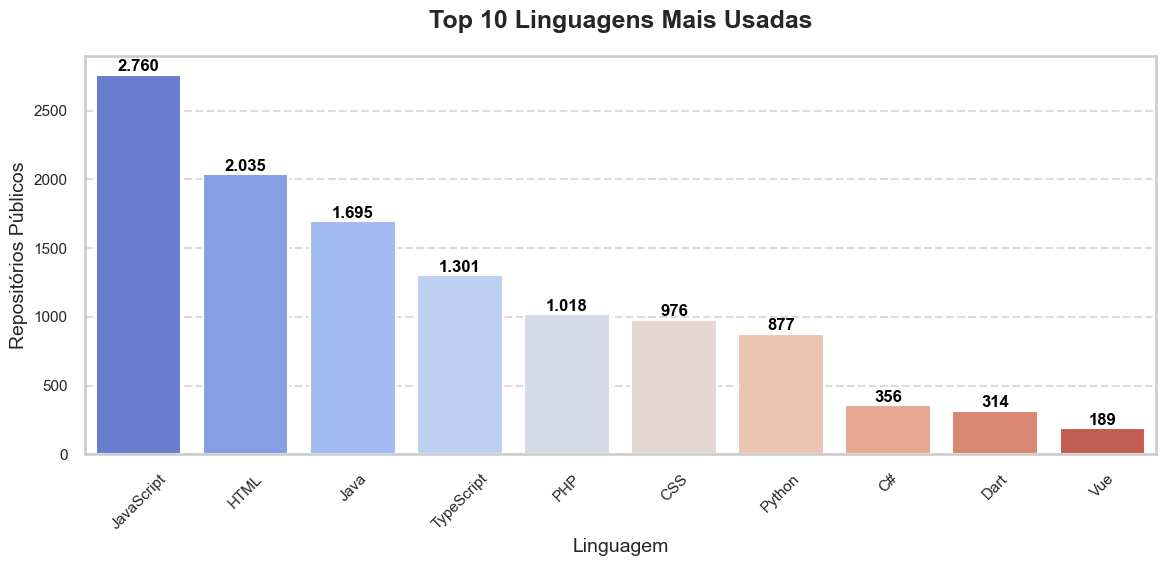

In [7]:
language_counts = repos_data['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']
top_10_languages = language_counts.head(10)

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='language',
    y='count',
    data=top_10_languages,
    palette='coolwarm'
)

for i, row in top_10_languages.iterrows():
    ax.text(
        i,                           
        row['count'] + 5,            
        f"{row['count']:,}".replace(',', '.'),  
        ha='center',                 
        va='bottom',                 
        fontsize=12,
        fontweight='bold',
        color='black'
    )

plt.title('Top 10 Linguagens Mais Usadas', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Linguagem', fontsize=14)
plt.ylabel('Repositórios Públicos', fontsize=14)
plt.xticks(rotation=45, fontsize=11)  
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Distribuição de Repositórios Curtidos

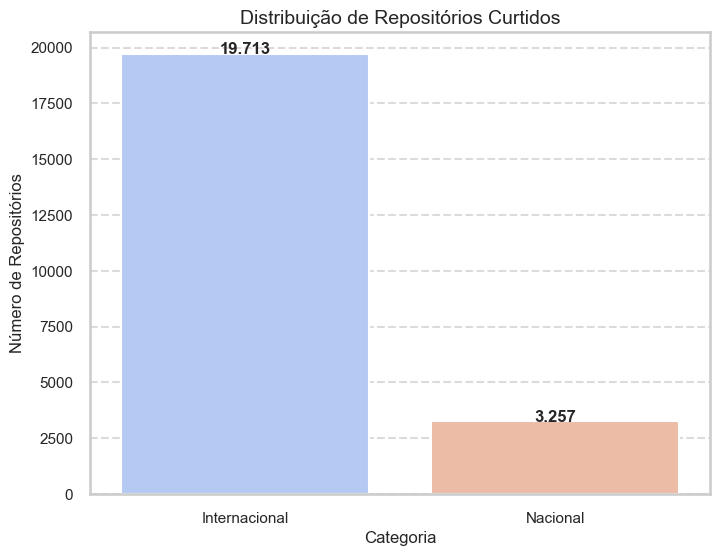

In [8]:
starred_data['nacional'] = starred_data['owner_id'].isin(users_data['id'])
starred_data['categoria'] = starred_data['nacional'].map({True: 'Nacional', False: 'Internacional'})
contagens = starred_data['categoria'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=contagens.index, y=contagens.values, palette='coolwarm')
plt.title('Distribuição de Repositórios Curtidos', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Número de Repositórios', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(contagens.values):
    plt.text(i, value + 0.1, f"{value:,.0f}".replace(',', '.'), ha='center', fontsize=12, fontweight='bold')

plt.show()


## Linguagens Mais Curtidas

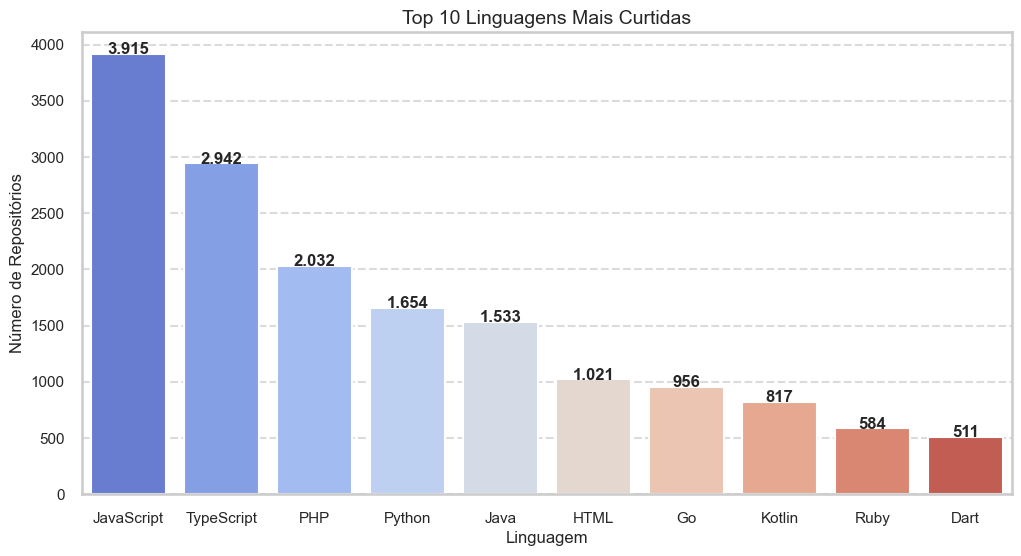

In [9]:
df_languages = starred_data['language'].value_counts().reset_index()
df_languages.columns = ['language', 'count']

df_languages = df_languages.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_languages['language'], y=df_languages['count'], palette='coolwarm')
plt.title('Top 10 Linguagens Mais Curtidas', fontsize=14)
plt.xlabel('Linguagem', fontsize=12)
plt.ylabel('Número de Repositórios', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(df_languages['count']):
    plt.text(i, value + 0.5, f"{value:,.0f}".replace(',', '.'), ha='center', fontsize=12, fontweight='bold')

plt.show()